In [404]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# models
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")


# UPLOADING THE DATASET

In [405]:
#Importing the dataset
df = pd.read_csv('Life Expectancy Data.csv')

#Setting max of columns to visualize 
pd.set_option("display.max_columns",None)

#Looking the dataset
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# DATASET DESCRIPTION 

In [406]:
#Dataset information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [407]:
#Statistics description of the dataset
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [408]:
#Looking for missing values 

df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [409]:
#Looking for duplicates

df.duplicated().sum()

0

In [410]:
#Checking categoric columns: 

cat_columns = df.select_dtypes(include=['object'])
print("Categorical columns:")
print(cat_columns.columns)


Categorical columns:
Index(['Country', 'Status'], dtype='object')


In [411]:
#Statistics description of categorical columns. 

df.describe(exclude="number")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


# Data Cleaning 

I realized there are spaces in some of the columns, the following code fix it:

In [412]:
#Fixing spaces issue

df = df.rename(columns = lambda x:x.strip())

In [413]:
#checking changes were made correctly 

df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [414]:
#Calculating null vallues percentage.
null_percentages = df.isnull().mean(axis=0) * 100

print(null_percentages)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [415]:
# Bar chart of null values

# Creating the bar chart with Plotly
fig = go.Figure(data=[go.Bar(x=null_percentages.index, y=null_percentages.values)])

# Adding title and axis labels
fig.update_layout(title='Null Values percentage', xaxis_tickangle=-45)

# Enable displaying values when hovering over the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Showing the plot
fig.show()

It can be seen that the columns with the highest number of missing values are Population, Hepatitis B and GDP.

In [416]:
# Impute missing values with the mean of each column
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

In [417]:
#checking missing values to see if the mean strategy worked 
df.isna().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

OUTLIERS

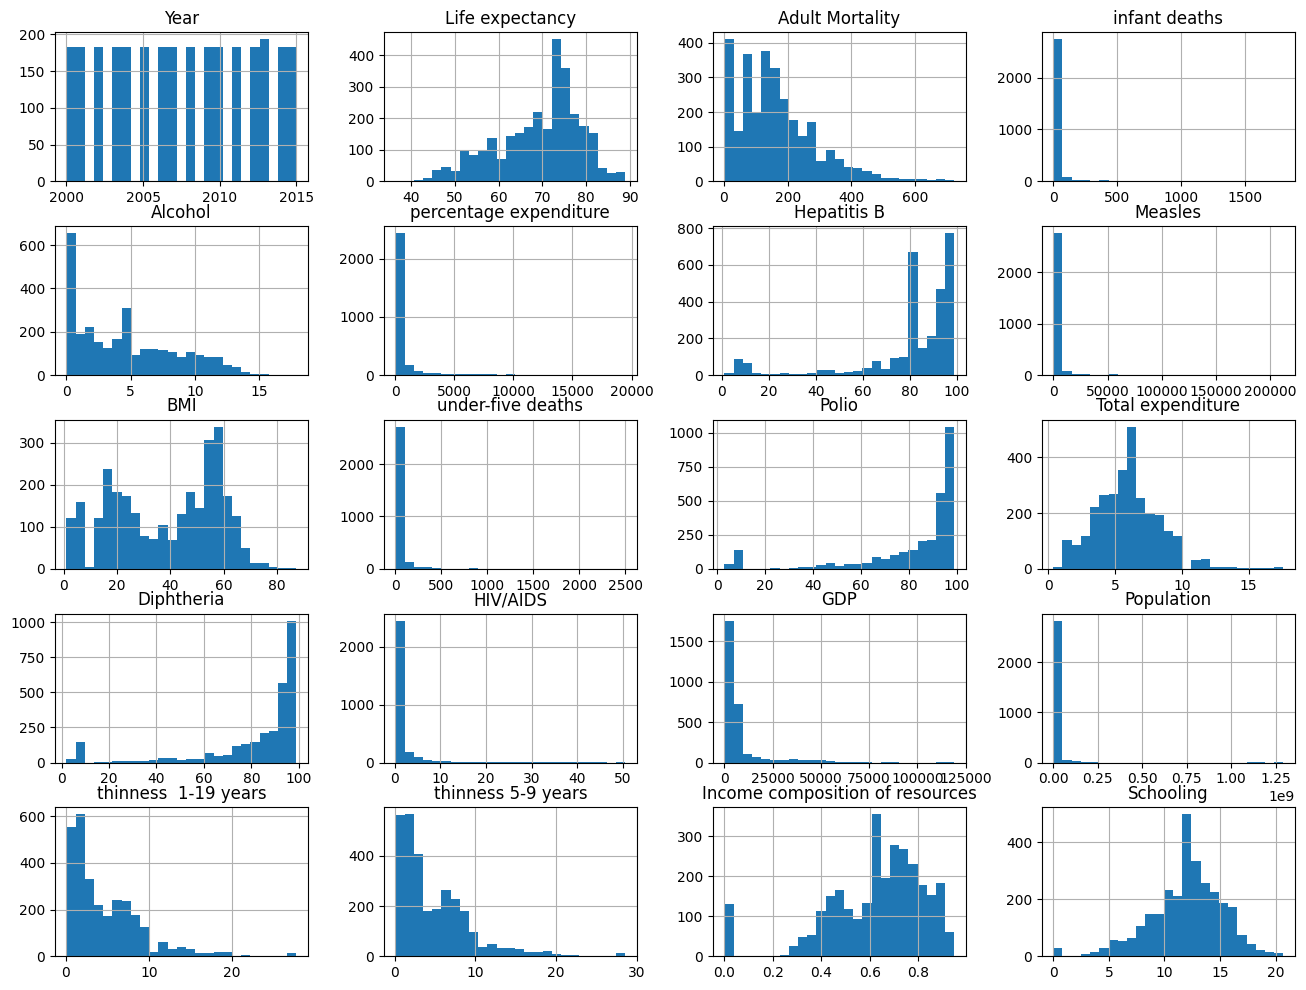

In [418]:
#Visualizing the distribution of data by columns

#Creating the histogram 
df.hist(bins=25, figsize=(16, 12))

#Showing the histogram created 
plt.show()

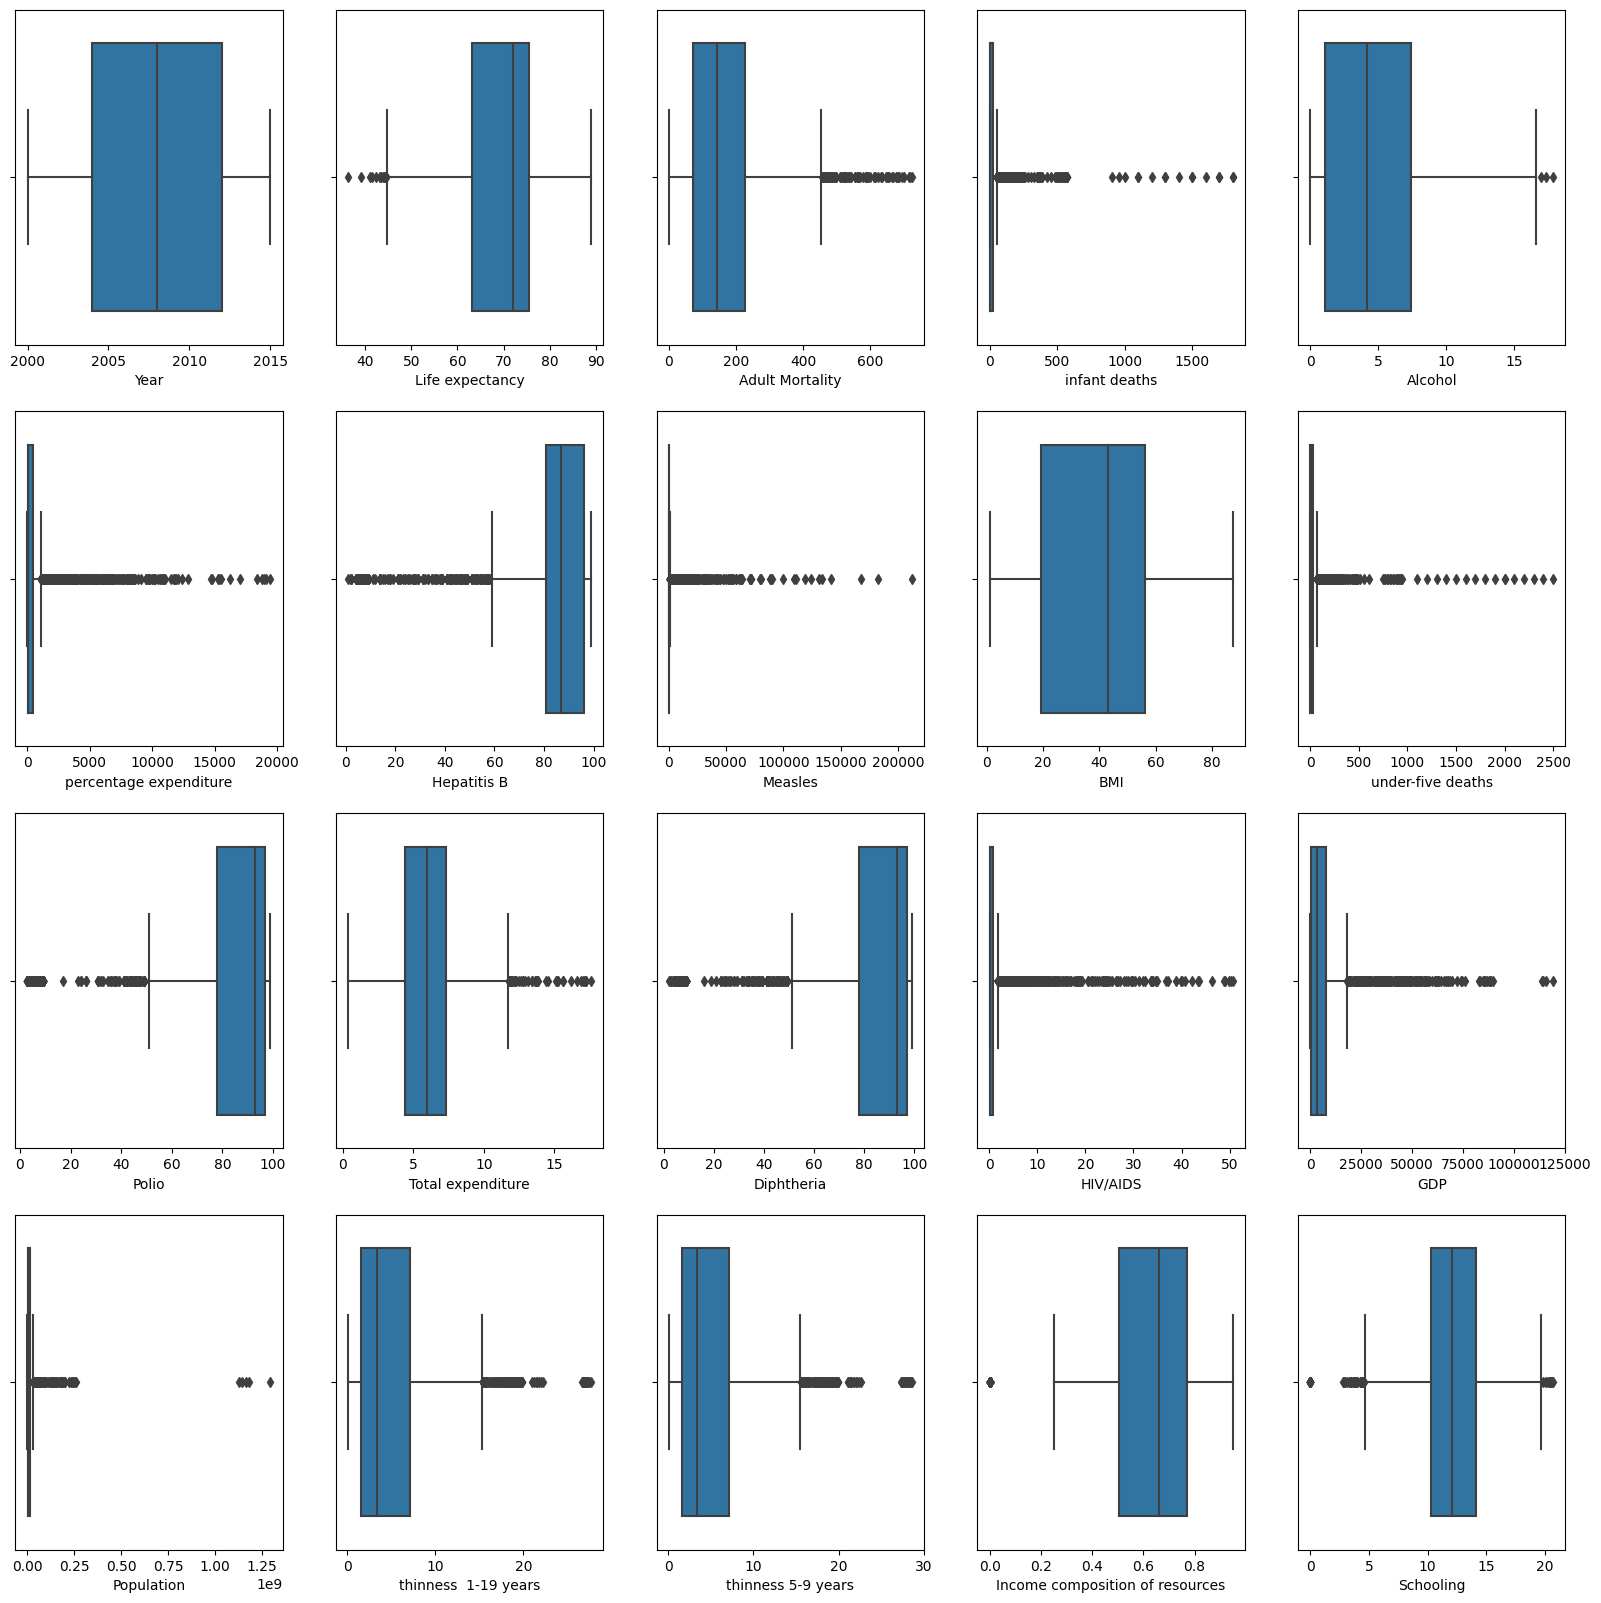

In [419]:
#Plotting boxplots to visualize outliers

#Creating the main graph
fig = plt.figure(figsize=(20,20))

#Creating the boxplots for each column in subplots inside the main graph.
c=1
for col in non_cat_columns:
    plt.subplot(4,5,c)
    g = sns.boxplot(x=col, data=df)
    c = c + 1


In [420]:
#Knowing that the column composition of resources is a column with values in between 0 and 1:

#Check if there are values outside the range (0, 1) in the "Income composition of resources" column
if not df['Income composition of resources'].between(0, 1).all():
    print("There are values outside the range (0, 1) in the 'Income composition of resources' column.")
else:
    print("All values in the 'Income composition of resources' column are within the range (0, 1).")


All values in the 'Income composition of resources' column are within the range (0, 1).


The Adult Mortality, infant deaths, Measles, under-five deaths, HIV/AIDS columns cannot have values greater than 1,000. Let's confirm this:

In [421]:
# List of columns to check
columns_to_check = ["Adult Mortality", "infant deaths", "Measles", "under-five deaths", "HIV/AIDS"]

# Check if there are values greater than 1000 in the specified columns
mask = (df[columns_to_check] > 1000)
if mask.any().any():
    columns_with_values_over_1000 = mask.any()
    print("Values greater than 1000 are present in the following columns:")
    print(columns_with_values_over_1000[columns_with_values_over_1000].index)
else:
    print("There are no values greater than 1000 in the specified columns.")



Values greater than 1000 are present in the following columns:
Index(['infant deaths', 'Measles', 'under-five deaths'], dtype='object')


The values of those columns that are greater than 1,000 will be eliminated, since they are erroneous values.

In [422]:
#Removing values greater than 1.000 
columns_list = ["infant deaths", "Measles", "under-five deaths"]
for col in columns_list:
    df.loc[df[col]>1000, col] = np.nan

In [423]:
#Describing skewness by column

# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculating skewness for each numeric column
skewness_by_column = numeric_columns.skew().sort_values(ascending=False)

# Displaying skewness by column
skewness_by_column

Population                         18.041176
infant deaths                       6.703833
under-five deaths                   6.140508
HIV/AIDS                            5.396112
percentage expenditure              4.652051
GDP                                 3.482880
Measles                             2.737869
thinness 5-9 years                  1.787788
thinness  1-19 years                1.721451
Adult Mortality                     1.176371
Total expenditure                   0.643921
Alcohol                             0.610026
Year                               -0.006409
BMI                                -0.220590
Schooling                          -0.619859
Life expectancy                    -0.639693
Income composition of resources    -1.177688
Diphtheria                         -2.079481
Polio                              -2.104863
Hepatitis B                        -2.142780
dtype: float64

Based on the boxplots and the skew description, we can understand the following:

a) Of the 20 numerical columns, we will not take into account the year column or the income composition column, for the management of outliers since the years do not have empty values and represent a date, and the other column has all its values between 0 and 1.

b) There is a skew to the right in Adult Mortality, infant deaths, Alcohol, percentage expenditure, Measles, under-five, deaths, HIV/AIDS, GDP, Population, thinness, 1-19 years, and thinness 5-9 years.

c) The Polio, Hepatitis B and Diphtheria columns have a high skew to the left.

ADDRESSING POSITIVELY SKEWED COLUMNS

To handle right skew I will implement the Yeo-Johnson Transformer and Quantile Transformer, and compare them to each other to know which transformation best suits each characteristic.


In [424]:
#Yeo Jhonson 
#Columns with right skew

columns_right_skewed = ["Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Measles", "under-five deaths",
                "HIV/AIDS", "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years"]

#Creating a list to compare methods. 
yeo_transform = []


#Creating a powertransofer object to perform Yeo-Johnson transformation
yeo_johnson_transformer = PowerTransformer(standardize=True)

# Loop over each column identified as right-skewed
for col in columns_right_skewed:
    
    # Creating a PowerTransformer object for Yeo-Johnson transformation
    yeo = PowerTransformer(standardize=True)
    
    # Applying Yeo-Johnson transformation to the original DataFrame and store the results in a new DataFrame
    df_yeo = pd.DataFrame(yeo.fit_transform(df[col].values.reshape(-1,1)))
    
    # Calculating and append the skewness of the transformed data to the list yeo_transform
    yeo_transform.append(round(df_yeo.skew()[0], 2))



In [425]:
#Quantile Transformer 
#Creating a list to use later to compare methods
quantile_transform = []

# Loop over each column identified as right-skewed
for col in columns_right_skewed:
    # Create a QuantileTransformer object with output distribution set to 'normal'
    quantile = QuantileTransformer(output_distribution='normal')
    
    # Apply QuantileTransformer to the values of the column and store the transformed data in a new DataFrame
    df_quantile = pd.DataFrame(quantile.fit_transform(df[col].values.reshape(-1,1)))
    
    # Calculate the skewness of the transformed data and append it to the quantile_transform list after rounding to 2 decimal places
    quantile_transform.append(round(df_quantile.skew()[0], 2))


In [426]:
dict={"Yeo_Johnson":yeo_transform, "Quantile_Transformer":quantile_transform}
pd.DataFrame(dict, index=columns_right_skewed)

,Yeo_Johnson,Quantile_Transformer
Adult Mortality,-0.08,-0.35
infant deaths,0.17,-0.75
Alcohol,-0.10,-1.70
percentage expenditure,-0.01,-1.12
Measles,0.23,-0.28
under-five deaths,0.16,-0.84
HIV/AIDS,0.97,0.48
GDP,-0.03,-0.01
Population,-0.05,-0.02
thinness 1-19 years,0.02,-0.79


It is observed that Yeo Johnson is most useful for the columns Adult Mortality, infant Deaths, Alcohol, Percentage Expenditure, Measles, Thinness 1-19 Years, and Thinness 5-9 Years. For the others: HIV/AIDS, GDP and Population could be good to apply quantile transformer. 

In [427]:
#Columns for Yeo-Johnson transformation
yeo_johnson_columns = ["Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", 
                       "Measles", "thinness 5-9 years", "thinness  1-19 years"]

#Columns for Quantile transformation
quantile_columns = ["HIV/AIDS", "GDP", "Population"]

# Applying Yeo-Johnson transformation to the specified columns
yeo_johnson_transformer = PowerTransformer(standardize=True)
for col in yeo_johnson_columns:
    df[col] = yeo_johnson_transformer.fit_transform(df[col].values.reshape(-1, 1))

# Applying Quantile transformation to the specified columns
quantile_transformer = QuantileTransformer()
for col in quantile_columns:
    df[col] = quantile_transformer.fit_transform(df[col].values.reshape(-1, 1))


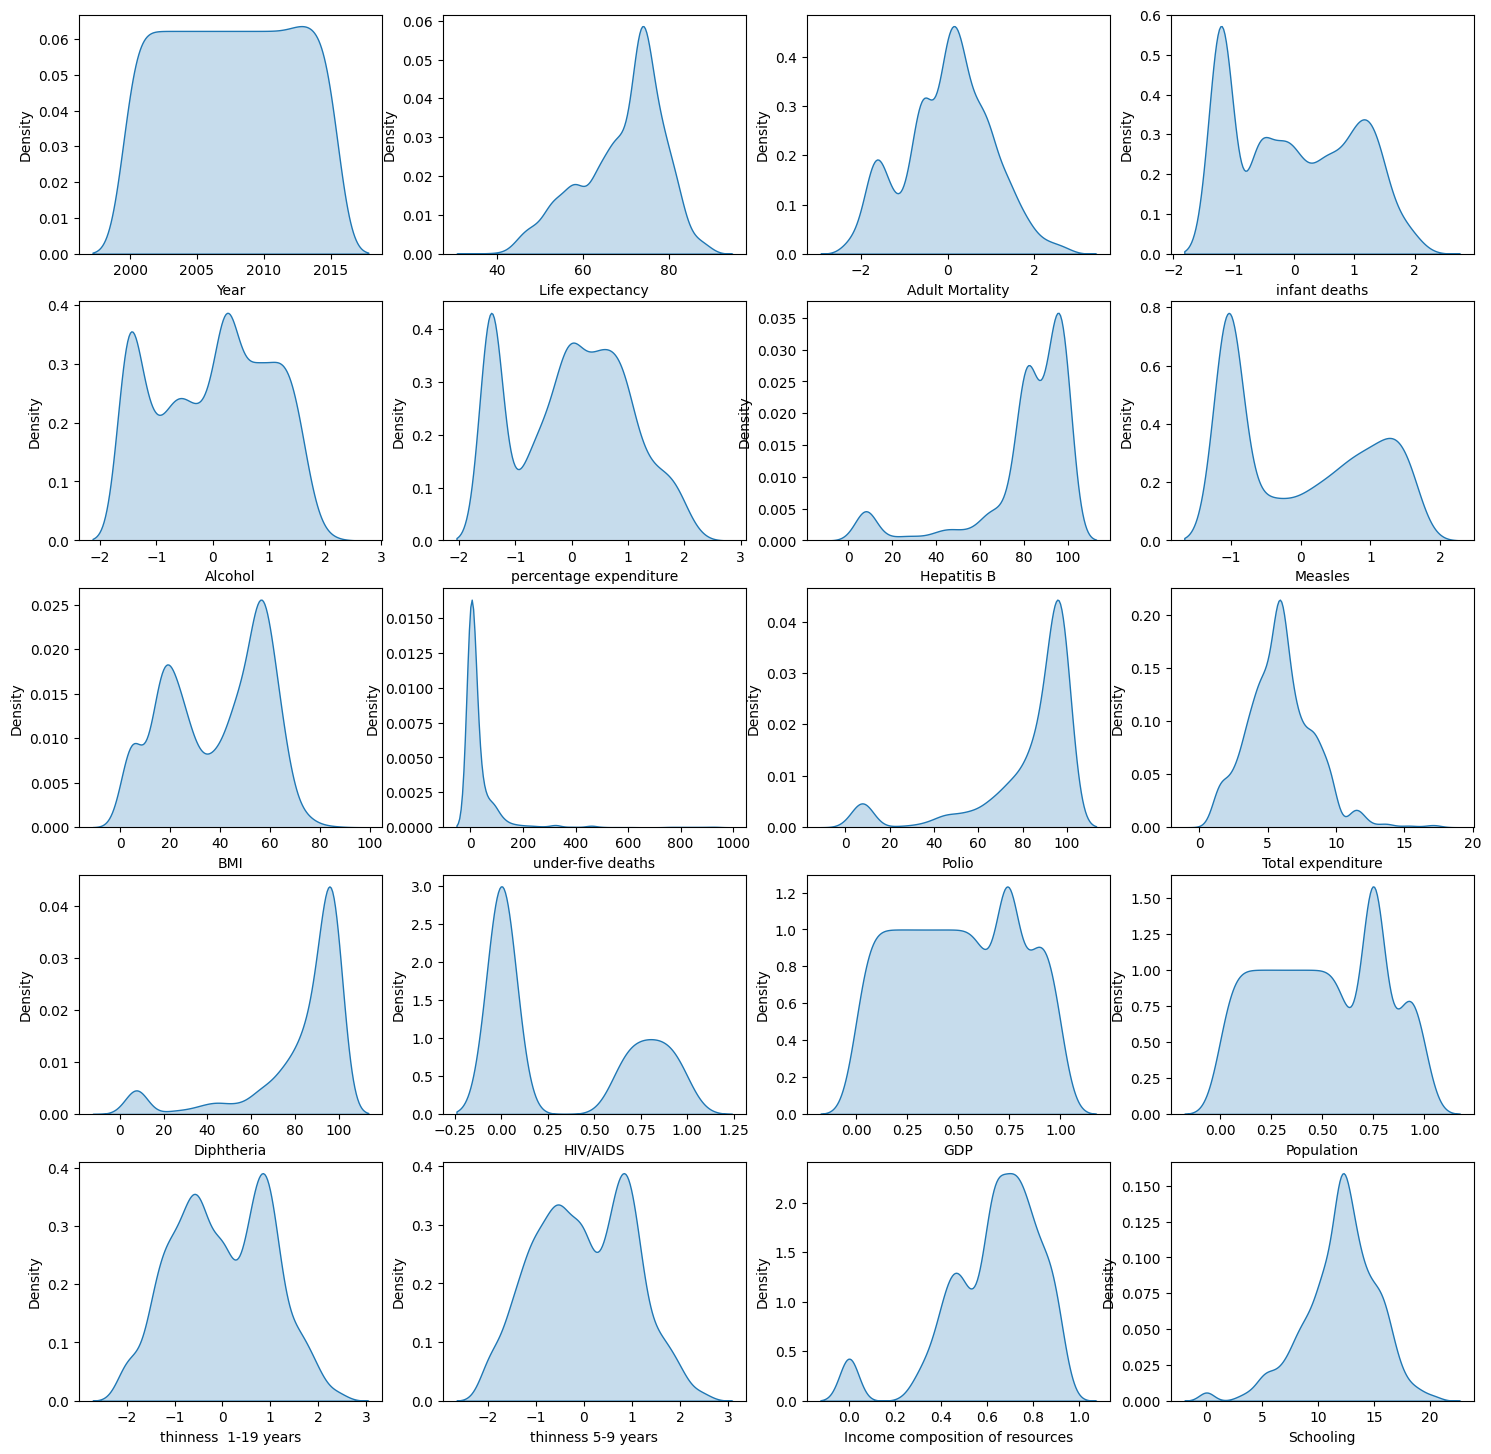

In [428]:
#Visualizing columns after transformation. 
cols = df.select_dtypes("number").columns

fig = plt.figure(figsize=(18,18))
c = 1
for col in cols:
    plt.subplot(5,4,c)
    g = sns.kdeplot(x=col, data=df, fill=True)
    c = c + 1

NEGATIVE SKEWED FEATURES

I will do the same as with the previous skews, I will use two methods and compare them and then apply the most optimal one.

In [429]:
columns_left_skewed = ["Hepatitis B", "Polio", "Diphtheria"]

In [430]:
#Yeo 

#Creating a list to compare methods. 
yeo_transform = []


#Creating a powertransofer object to perform Yeo-Johnson transformation
yeo_johnson_transformer = PowerTransformer(standardize=True)

# Loop over each column identified as let-skewed
for col in columns_left_skewed:
    
    # Creating a PowerTransformer object for Yeo-Johnson transformation
    yeo = PowerTransformer(standardize=True)
    
    # Applying Yeo-Johnson transformation to the original DataFrame and store the results in a new DataFrame
    df_yeo = pd.DataFrame(yeo.fit_transform(df[col].values.reshape(-1,1)))
    
    # Calculating and append the skewness of the transformed data to the list yeo_transform
    yeo_transform.append(round(df_yeo.skew()[0], 2))

In [431]:
#Quantile Transformer 

#Creating a list to use later to compare methods
quantile_transform = []

# Loop over each column identified as left-skewed
for col in columns_left_skewed:
    # Create a QuantileTransformer object with output distribution set to 'normal'
    quantile = QuantileTransformer(output_distribution='normal')
    
    # Apply QuantileTransformer to the values of the column and store the transformed data in a new DataFrame
    df_quantile = pd.DataFrame(quantile.fit_transform(df[col].values.reshape(-1,1)))
    
    # Calculate the skewness of the transformed data and append it to the quantile_transform list after rounding to 2 decimal places
    quantile_transform.append(round(df_quantile.skew()[0], 2))


In [432]:
#Square Transformer 

#Creating a list to use later to compare methods
Square_transformer = []

# Loop over each column identified as left-skewed
for col in columns_left_skewed:

    square_transform = FunctionTransformer(np.square)
    df_square_transform = pd.DataFrame(square_transform.fit_transform(df[col].values.reshape(-1,1)))
    Square_transformer.append(round(df_square_transform.skew()[0],2))

In [433]:
#Comparing transformations 

dict={"Yeo_Johnson":yeo_transform, "Quantile_Transformer":quantile_transform, "Square_Transformer":Square_transformer}
pd.DataFrame(dict, index=columns_left_skewed)

,Yeo_Johnson,Quantile_Transformer,Square_Transformer
Hepatitis B,-0.88,1.78,-1.28
Polio,-1.02,1.49,-1.35
Diphtheria,-1.03,1.60,-1.37


It is concluded that the transformation method for these characteristics is Yeo Johnson.

In [434]:
#Applying yeo johnsons to left skewed features. 

#Columns for Yeo-Johnson transformation
yeo_johnson_columns = ["Hepatitis B", "Polio", "Diphtheria"]

# Applying Yeo-Johnson transformation to the specified columns
yeo_johnson_transformer = PowerTransformer(standardize=True)
for col in yeo_johnson_columns:
    df[col] = yeo_johnson_transformer.fit_transform(df[col].values.reshape(-1, 1))


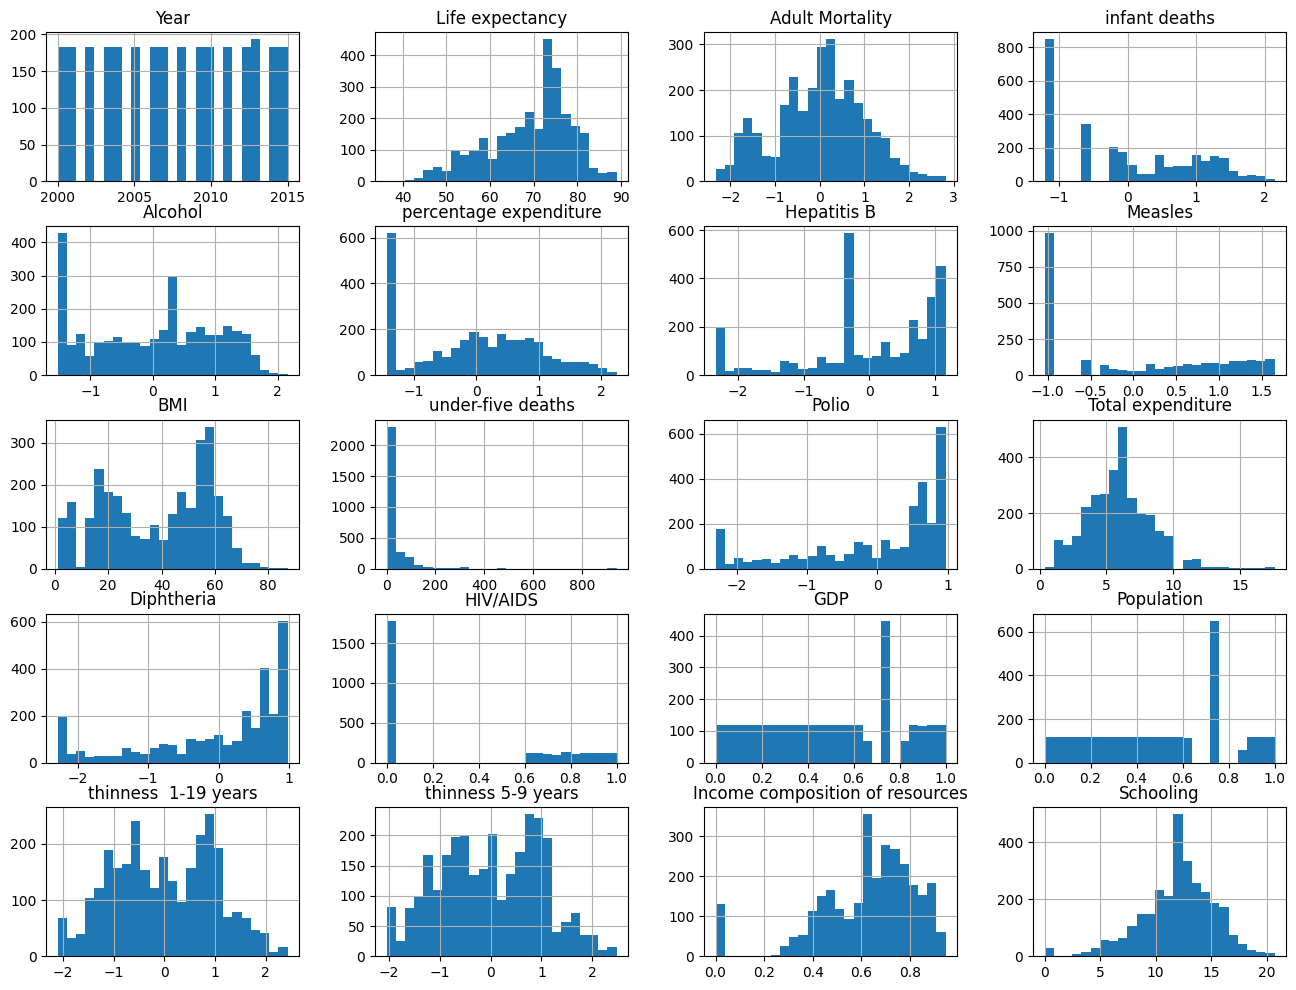

In [435]:
#Visualizing data after transformation. 

#Selecting numeric columns
cols = df.select_dtypes("number").columns

#Creating the histogram 
df.hist(bins=25, figsize=(16, 12))

#Showing the histogram created 
plt.show()

ANALYZING CORRELATIONS

<Axes: >

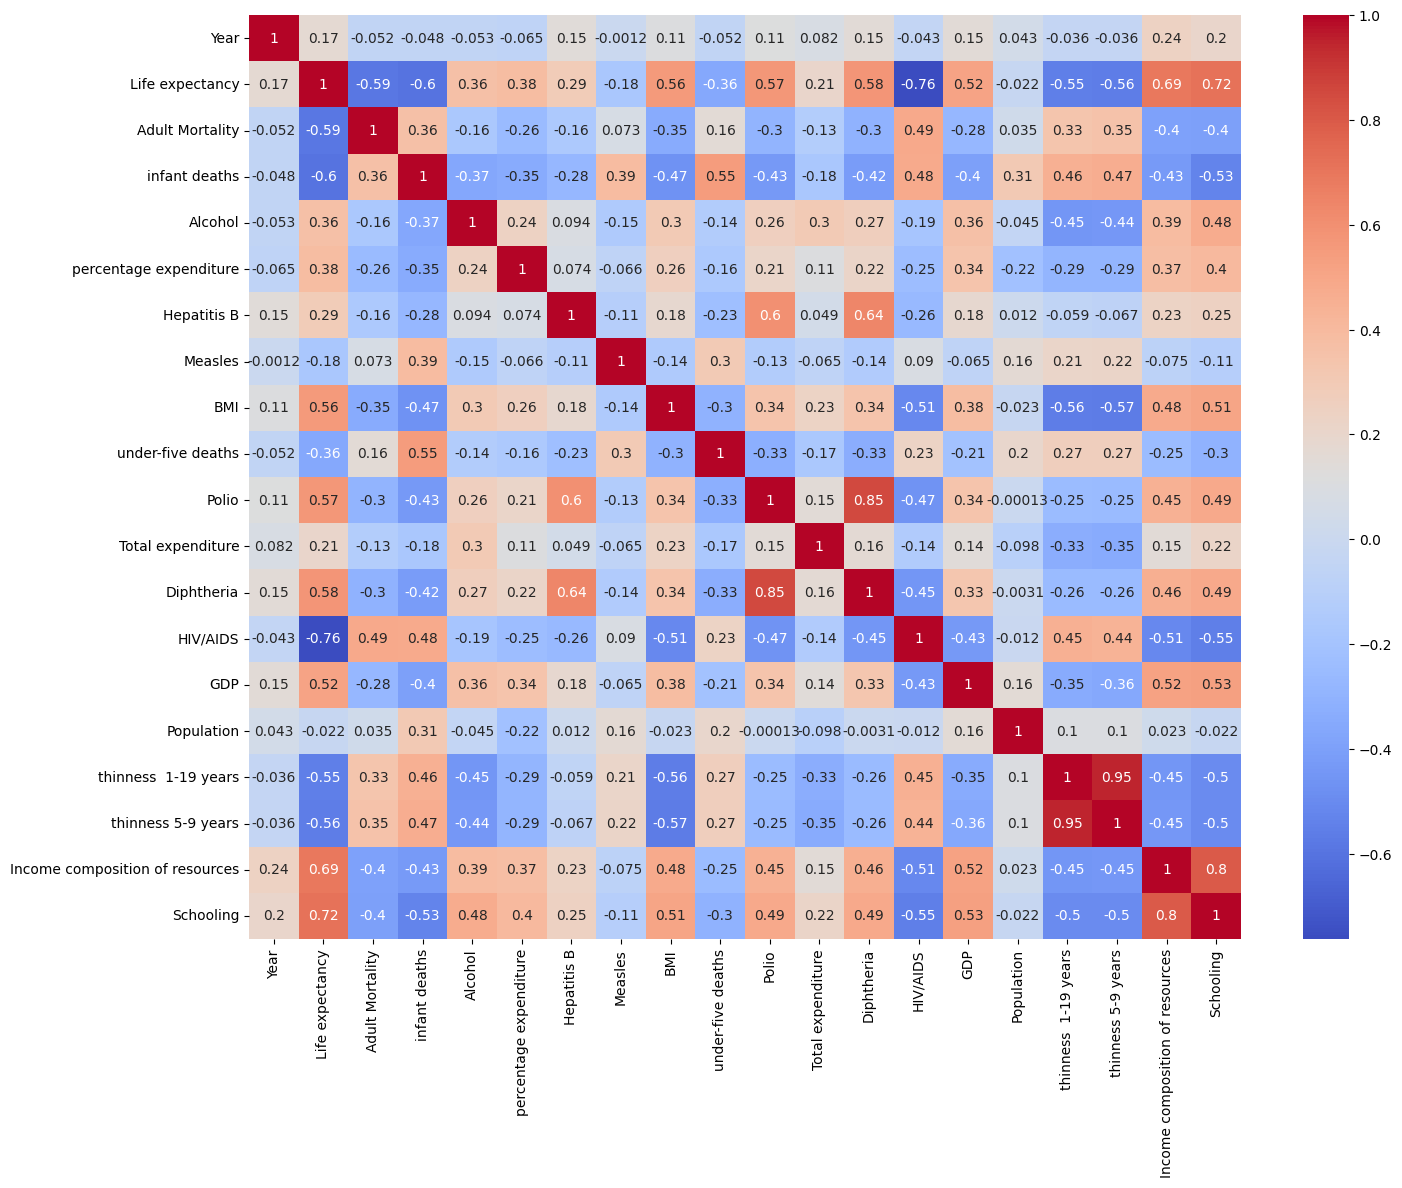

In [436]:
features = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df[list(features.columns)].corr(), cmap = 'coolwarm', annot = True, ax=ax)

A high relationship is evident to consider between thinness 1-19 years and thinness 5-9 years, and a high relationship is also observed between schooling and income composition of resources.

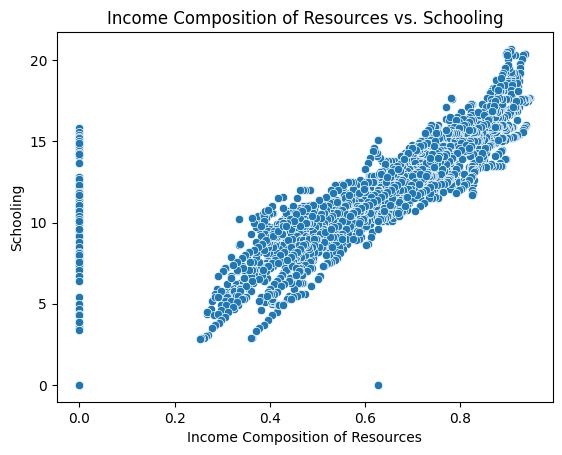

In [437]:
#Visualizing correlation in between Income composition of resources and Schooling

# Creating the scatterplot
sns.scatterplot(data=df, x='Income composition of resources', y='Schooling')

# Add title and labels
plt.title('Income Composition of Resources vs. Schooling')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Schooling')

# Show the plot
plt.show()

In [438]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


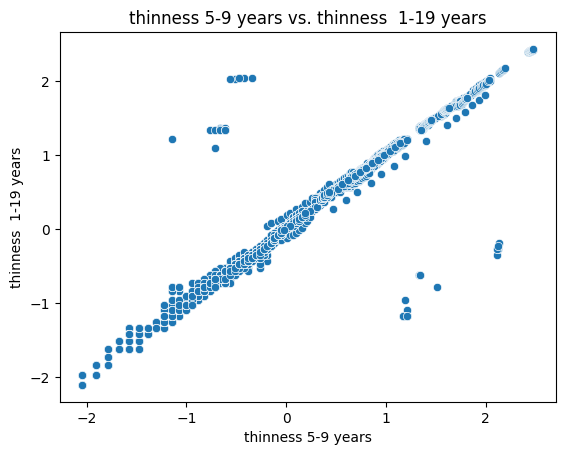

In [439]:
#Visualizing correlation in between thinness 5-9 years and thinness  1-19 years

# Creating the scatterplot
sns.scatterplot(data=df, x='thinness 5-9 years', y='thinness  1-19 years')

# Add title and labels
plt.title('thinness 5-9 years vs. thinness  1-19 years')
plt.xlabel('thinness 5-9 years')
plt.ylabel('thinness  1-19 years')

# Show the plot
plt.show()

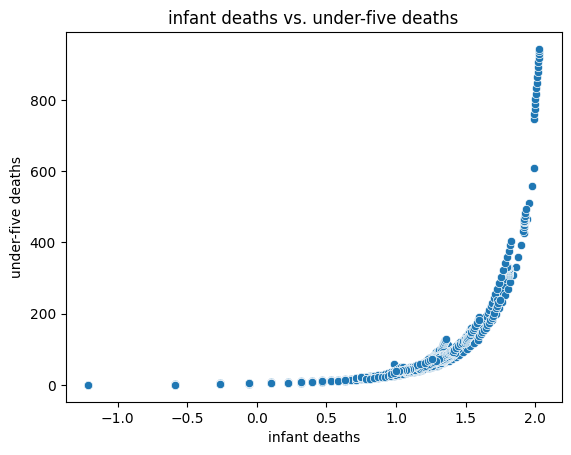

In [440]:
#Visualizing correlation in between infant deaths and under-five deaths

# Creating the scatterplot
sns.scatterplot(data=df, x='infant deaths', y='under-five deaths')

# Add title and labels
plt.title('infant deaths vs. under-five deaths')
plt.xlabel('infant deaths')
plt.ylabel('under-five deaths')

# Show the plot
plt.show()

REMOVING REDUNDANT FEATURES

In [441]:
df = df.drop(columns=["thinness 5-9 years"])

MODEL

SPLITING DATA

In [442]:
# Drop columns "Life expectancy", "Year", and "Country" from the dataframe and assign the result to X
X = df.drop(columns=["Life expectancy","Year", "Country"])
# Extract the column "Life expectancy" from the dataframe and assign it to y
y = df["Life expectancy"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
print("X train shape :",X_train.shape)
print("Y train shape :",y_train.shape)
print("X test shape :",X_test.shape)
print("Y test shape :",y_test.shape)

X train shape : (2350, 18)
Y train shape : (2350,)
X test shape : (588, 18)
Y test shape : (588,)


PREPROCESSING NUMERICAL AND CATEGORICAL FEATURES

In [444]:
# Creating a LabelEncoder object
encoder = LabelEncoder()

# Applying encoding to the 'Status' column in the training set
X_train['Status'] = encoder.fit_transform(X_train['Status'])

# Applying the same encoding to the test set
X_test['Status'] = encoder.transform(X_test['Status'])


In [445]:
# List comprehension to iterate through columns in X and filter out columns with non-object data type
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']

# Print the list of numerical column names
print(numerical_cols)


['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


STANDARD SCALING 

In [446]:
# Creating a StandardScaler object
sc = StandardScaler()

# Applying feature scaling to the numerical columns in the training set
X_train[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

# Applying the same feature scaling to the numerical columns in the test set
X_test[numerical_cols] = sc.transform(X_test[numerical_cols])


In [447]:
#Displaying the first five rows of the X_train df
X_train.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
456,1,-0.097328,-1.218725,0.424151,0.672197,0.879458,-1.028161,-0.654211,-0.360713,0.874145,-0.679478,0.883585,1.040496,0.005632,-0.809300,0.993497,-0.143247,-0.038796
462,1,0.123185,-1.218725,0.074451,0.360066,-0.314756,-1.028161,-0.824603,-0.360713,0.279610,-0.309913,-2.289129,1.094464,-0.462618,-0.850618,1.170290,-0.341601,-0.315474
2172,1,0.049523,-1.218725,1.308526,-1.453477,1.159842,-1.028161,0.297983,-0.360713,0.965617,0.682516,0.975099,-0.793174,0.842825,0.872894,0.256316,0.506360,0.268623
2667,1,-1.740337,-0.047854,-0.775072,0.879284,1.064743,0.487778,1.039691,-0.326207,0.874145,0.549638,0.883585,-0.793174,0.236256,-0.502265,0.715598,0.441895,0.821978
381,1,-0.398109,-1.218725,-1.438731,1.056134,1.159842,-1.028161,-0.528922,-0.360713,0.965617,-1.053196,0.534106,-0.793174,1.383223,0.872894,0.769394,0.937778,0.391591


FEATURE IMPORTANCE

In [448]:
# Creating and train a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
importance_scores = rf_model.feature_importances_

# Creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})


MODELS

EVALUATING DIFFERENT MODELS

In [449]:
# Imputing missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing lists to store results
model_name = []
RMSE = []
R2_score = []

# List of models
models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    LinearRegression(),
    XGBRegressor(random_state=42),
    ExtraTreeRegressor(random_state=42)
]

# Iterating over each model
for rf_model in models:
    # Finding and removing NaN values
    nan_indices_train = np.isnan(X_train_imputed).any(axis=1)
    nan_indices_test = np.isnan(X_test_imputed).any(axis=1)
    
    X_train_cleaned = X_train_imputed[~nan_indices_train]
    y_train_cleaned = y_train[~nan_indices_train]
    X_test_cleaned = X_test_imputed[~nan_indices_test]
    y_test_cleaned = y_test[~nan_indices_test]

    # Fit the model
    rf_model.fit(X_train_cleaned, y_train_cleaned)
    
    # Make predictions
    prediction = rf_model.predict(X_test_cleaned)
    
    # Store the results
    model_name.append(rf_model.__class__.__name__)
    RMSE.append(str(mean_squared_error(prediction, y_test_cleaned, squared=False)))
    R2_score.append(str(r2_score(y_test_cleaned, prediction) * 100) + " %")



In [450]:
# Creating a DataFrame with model names, RMSE, and R2 scores
models_df = pd.DataFrame({"Model-Name": model_name, "RMSE": RMSE, "R2_Score": R2_score})

# Seting the index of the DataFrame to be the 'Model-Name' column
models_df = models_df.set_index('Model-Name')

# Sorting the DataFrame by 'R2_Score' column in descending order
models_df_sorted = models_df.sort_values("R2_Score", ascending=False)
        
print(models_df_sorted)


                                         RMSE             R2_Score
Model-Name                                                        
RandomForestRegressor      1.6509897891198655  96.85374436248286 %
XGBRegressor               1.7747039372454398  96.36455936045496 %
GradientBoostingRegressor  2.0772953739754323  95.01916975996816 %
DecisionTreeRegressor      2.4962629451499017  92.80740027184551 %
ExtraTreeRegressor         2.8982138778796602  90.30459186860917 %
LinearRegression           3.9981491526836392    81.548859520368 %


THE BEST MODEL IS RANDOM FOREST REGRESSOR